In [1]:
import ConfinedBrownianAnalysis as cb


In [2]:
# from Data_analysis import Data_analysis
# from Dedrift import Dedrift
# from Data import Data
import matplotlib.pyplot as plt

import seaborn
import seaborn as sns


%matplotlib widget

custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 1,
    "figure.dpi": 100,
    "text.usetex": False,
    "font.family": "serif",
}
sns.set_theme(context="notebook", style="ticks", rc=custom_params)

In [3]:
load_observables = True
save_observable = False
filename = "Observables.pickle"

In [4]:
if load_observables:
        analysis = cb.Load(filename)

In [5]:
data = cb.Data(file="example_trajectory.mat", fps=100, cutoff=120000)

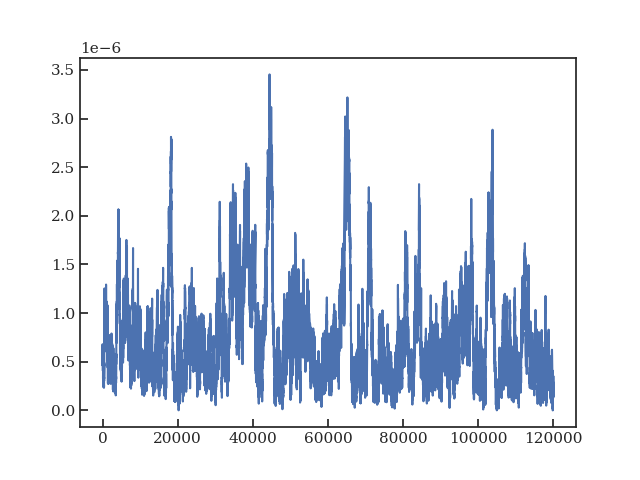

In [6]:
plt.figure()
plt.plot(data.z)
plt.show()

In [7]:
# args = {
#     "MSD_bins": 100,  # Number of PDF bins
#     "t_LMSD": (20.0, 25),  # Time used to compute the plateau
#     "t_sPDF": (0.01, 0.05),  # Short time PDF dispalcement
#     "range_pdf": (1e-8, 2.5e-6),  # Range of the height PDF
#     "num_pdf": 70,  # number of bins in the height PDF
#     "range_F_eq": (2e-8, 2e-6),
#     "num_F_eq": 20,
#     "SPDF_bins": 40,  # Short time PDF bins
#     "t_Lpdf": (18.0, 20.0),  # time for the long time PDF
#     "range_D": (1e-9, 2e-6),  # range of computation of Ronceray
#     "N_local_D": 200,  # mber of points for the diffusion computation
#     "ordre_D": 2,  # Ronceray polynomial order
#     "LPDF_bins": 50,  # number of bins in the long time PDF
# }

In [8]:
# data.dedrift(window=5000)
# if not load_observables:
#     analysis = cb.Observables(data, **args)

In [9]:
# data.plot_1D("z")

In [10]:
if not load_observables:
    analysis.computing_all()

In [11]:
# analysis.general_plot()

In [12]:
if save_observable:
        analysis.save(filename)


In [13]:
## test to reload it


## Minizer

In [14]:
Model = cb.Model()

In [15]:
args_minimizer = {
    "Model": Model,
    "analysis": analysis,
    "range_MSD_short": (1e-2, 1),
    "range_plateau_MSD": (1e-2, 1e-1),
    "range_C4_short": (1e-2, 1e-1),
    "range_diffusion": None,
    "range_Peq": None,
    "range_Feq": None,
}

In [16]:
analysis

In [17]:
import numpy as np
dz = np.linspace(-5e-6, 5e-6, 10000)

In [18]:
#Model.plateau_MSD()
P_Dz = Model.long_time_pdf(dz)

In [19]:
Minimizer = cb.Minimizer(**args_minimizer, method = "sum")

In [20]:
# Minimizer.Model.lB = 1.4e-6
# Minimizer.Compute(verbose=True)

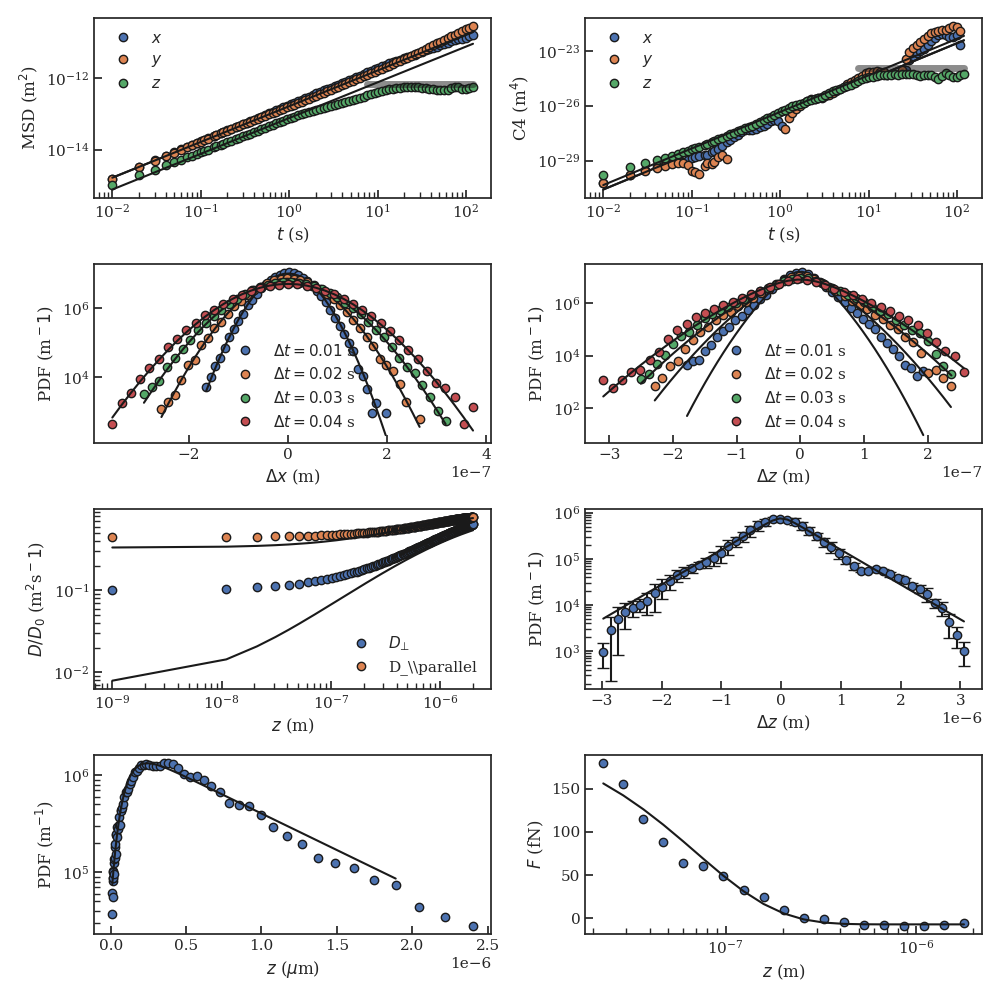

In [21]:
Minimizer.plot_result()

In [22]:
Minimizer.to_vary=["B", "Drho", "lD", "b"]
Minimizer.Optimizer(kwargs ={"method" :"Nelder-Mead"} )

done


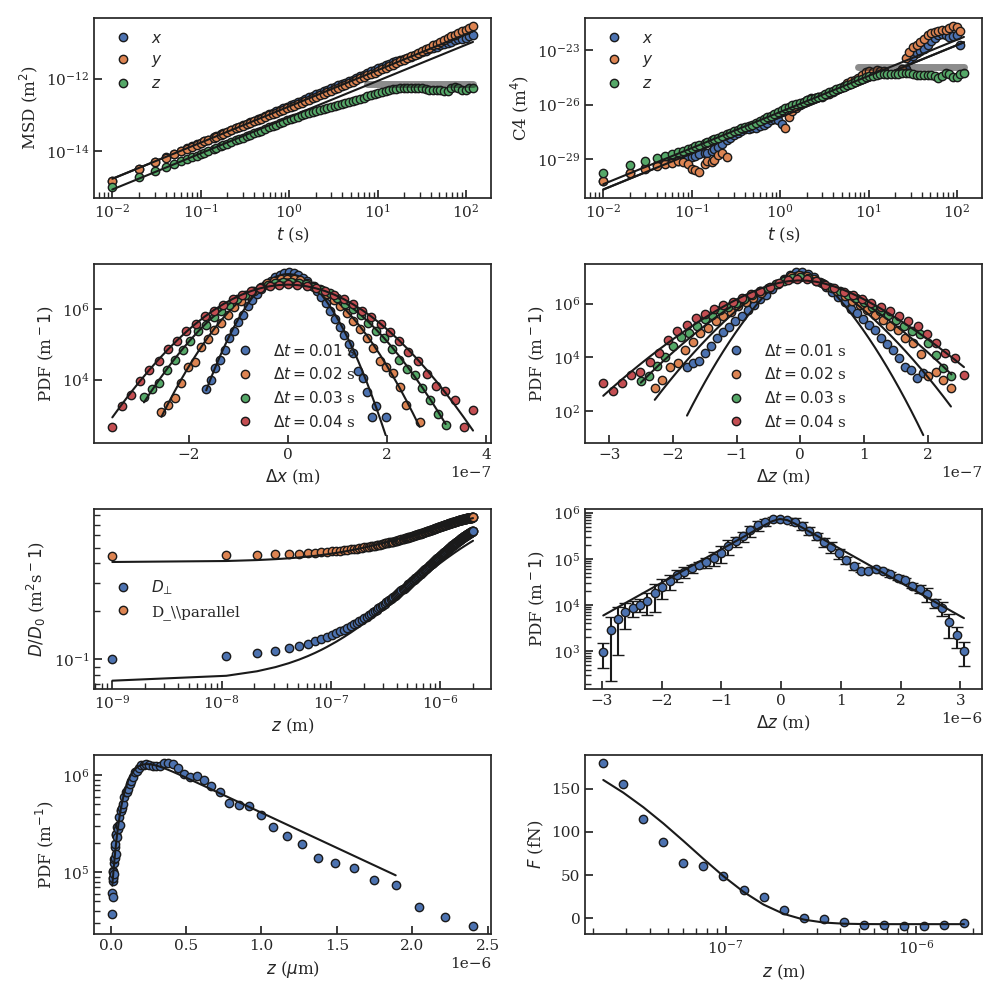

In [23]:
Minimizer.plot_result()